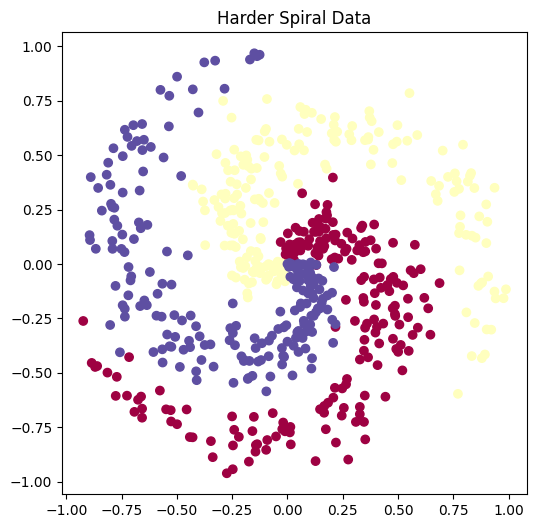

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class  # Points per class
    D = 2                 # Input dimension (x, y)
    K = num_classes       # Number of classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)  # Radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise  # Angle + noise
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    return X, y

# Generate the data
X, y = generate_harder_spiral_data()

# Visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()


In [11]:
 X.shape   #600 rows and 2 colums


(600, 2)

# **1. Data Preparation**

In [55]:
# One-hot encode targets
y_cat = to_categorical(y)
y_cat


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [56]:
# Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)
# random state means ensures that the split is always the same every time you run it.


# **2. Model Building**

In [58]:
# Build MLP
model = Sequential([
    # Add More Layers (Deeper Network)
    Dense(64, activation='relu',input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# #categorical_crossentropy because target is one hot encoded


# # Train
# # for overfitting reduce  used early stopping
# history = model.fit(X_train, y_train,
#                     validation_data=(X_test, y_test),
#                     epochs=300,
#                     batch_size=16,
#                     verbose=1)


from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


history = model.fit(X_train, y_train,validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4292 - loss: 1.0106 - val_accuracy: 0.4896 - val_loss: 0.8017
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5232 - loss: 0.7750 - val_accuracy: 0.5208 - val_loss: 0.7727
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6303 - loss: 0.6897 - val_accuracy: 0.7083 - val_loss: 0.6457
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7972 - loss: 0.5559 - val_accuracy: 0.8333 - val_loss: 0.4600
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8667 - loss: 0.3945 - val_accuracy: 0.8542 - val_loss: 0.3622
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9022 - loss: 0.2907 - val_accuracy: 0.8854 - val_loss: 0.3288
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9301 - loss: 0.2212 - val_accuracy: 0.8958 - val_loss: 0.3156
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8841 - loss: 0.2671 - val_accuracy: 0.7917 - 

In [60]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [61]:
# Evaluate and Visualize
# Predict
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true= np.argmax(y_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [62]:
# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true, y_pred))

Accuracy (All Features MLP): 0.975


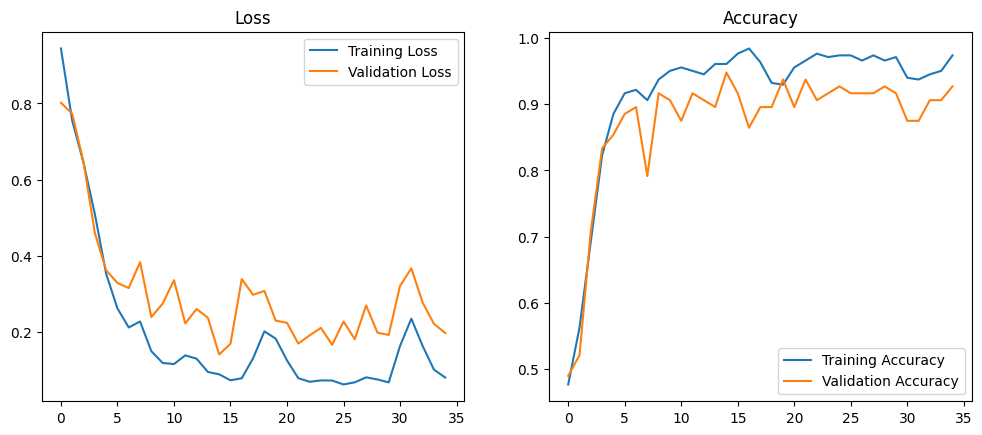

In [63]:
# View learning history in terms of loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()

# **Learning rate reduce**
just for testing how i will look likes  




Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4904 - loss: 1.0539 - val_accuracy: 0.4688 - val_loss: 1.0084
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4843 - loss: 0.9821 - val_accuracy: 0.5521 - val_loss: 0.9503
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5698 - loss: 0.9207 - val_accuracy: 0.5000 - val_loss: 0.9068
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5034 - loss: 0.8862 - val_accuracy: 0.4688 - val_loss: 0.8730
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5056 - loss: 0.8350 - val_accuracy: 0.4375 - val_loss: 0.8405
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 0.8136 - val_accuracy: 0.4688 - val_loss: 0.8251
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5717 - loss: 0.7362 - val_accuracy: 0.5000 - val_loss: 0.8019
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6240 - loss: 0.7162 - val_accuracy: 0.5208 - val_loss

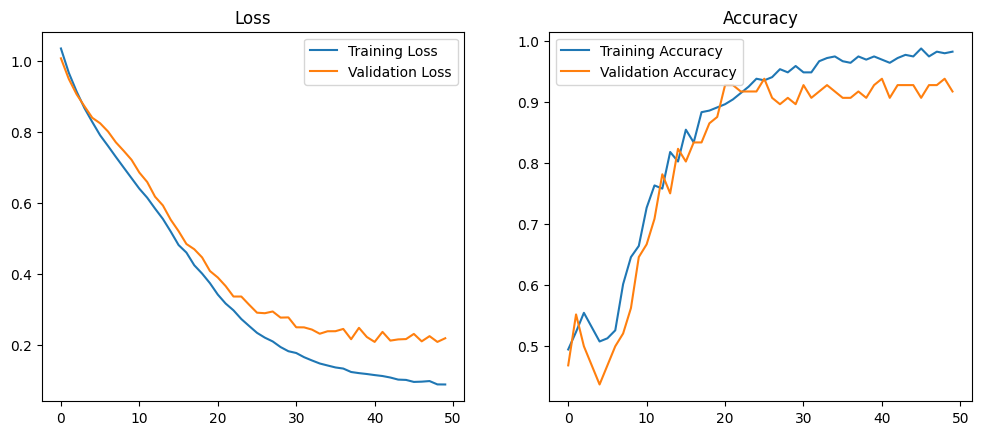

In [66]:
# Build MLP
model = Sequential([
    # Add More Layers (Deeper Network)
    Dense(64, activation='relu',input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# #categorical_crossentropy because target is one hot encoded


from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


history = model.fit(X_train, y_train,validation_split=0.2,
                    epochs=50,
                    batch_size=20,
                    callbacks=[early_stop],
                    verbose=1)



# View learning history in terms of loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()

In [67]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
# plt.title("Confusion Matrix – MLP with All 3 Features")
# plt.show()

print("Accuracy (All Features MLP):", accuracy_score(y_true, y_pred))

Accuracy (All Features MLP): 0.975


In [68]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    preds = np.argmax(probs, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.4, cmap='Pastel2')
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', cmap='Dark2')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

3581/3581 ━━━━━━━━━━━━━━━━━━━━ 4s 954us/step


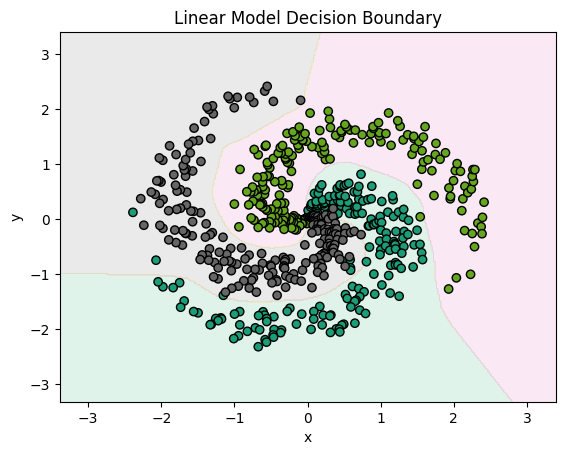

In [47]:
# Decision boundaries
plot_decision_boundary(model, X_scaled, y_cat, "Linear Model Decision Boundary")

<!-- Increase Model Depth: -->



# **4. Reflection Questions**

**Q1:How did you decide the number of hidden layers and neurons?**
                     
  The number of hidden layers and neurons was chosen based on the complexity of the dataset and through empirical experimentation. Since the task involved classifying a non-linear and complex spiral dataset, a deeper network was necessary to capture the intricate patterns and decision boundaries.
In architecture used 3 hidden layers with 64, 32, and 16 neurons.Each layer uses the ReLU activation function to introduce non-linearity and avoid vanishing gradient issues.The final output layer uses 3 neurons with softmax activation to classify the input into one of the three target classes.



**Q2: How did different learning rates affect the results?**
Different learning rates significantly impacted the model'S training behavior and final performance.It actually controls how much the model updates its weights in response to the calculated error during each training step.

High learning rate (e.g 0.1 or above):
The model often failed to converge properly. It either overshot the optimal weights or oscillated around the minimum, leading to unstable or poor accuracy.

Low learning rate (e.g 0.0001):
The model trained very slowly and sometimes got stuck in local minima. It required many epochs and still might not achieve good performance within a reasonable training time.

Optimal learning rate (used: 0.001):
This provided a good balance — it allowed the model to converge smoothly and reach high validation accuracy. It helped minimize both training loss and overfitting when combined with early stopping.

**Q3:Did you encounter overfitting or underfitting? How did you deal with it?**
Yes, during training, overfitting was observed. The model performed well on the training data but started to show increased loss and decreased accuracy on the validation data after a certain number of epochs. This is typical when the model is too complex or trains for too long without control.
 the following techniques were applied to handle this:

Early Stopping:
Training was stopped automatically if the validation loss did not improve for 20 consecutive epochs. This prevented the model from continuing to train past the point of best generalization.

Data Standardization:
Inputs were scaled using a standard scaler, which helped the model converge more efficiently and avoid extreme weight updates.

Network Design:
The architecture used a gradually decreasing number of neurons (64 → 32 → 16), which helped reduce model capacity layer-by-layer to avoid overfitting.



**Q4: If you had more time, how would you further improve the model?**
If I had more time, I would explore the following strategies to further improve the model

Hyperparameter Tuning:
Systematically test different values for learning rate, batch size, number of layers, and neurons using grid search.


